In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("pastel")

# Crear carpetas necesarias
os.makedirs("datos", exist_ok=True)
os.makedirs("graficos", exist_ok=True)


In [2]:
np.random.seed(42)
n_estudiantes = 500

data = {
    "nombre": [f"Estudiante_{i}" for i in range(1, n_estudiantes + 1)],
    "edad": np.clip(np.random.normal(22, 3, n_estudiantes), 18, 35).astype(int),
    "sexo": np.random.choice(["Masculino", "Femenino"], size=n_estudiantes, p=[0.45, 0.55]),
    "numero_hijos": np.random.poisson(0.7, size=n_estudiantes),
    "horas_trabajo": np.random.choice([0, 15, 30, 40], size=n_estudiantes, p=[0.3, 0.4, 0.2, 0.1]),
    "dependencia_economica": np.random.choice(
        ["Padres", "Trabajo propio", "Beca", "Pareja", "Autofinanciado"],
        size=n_estudiantes, 
        p=[0.5, 0.25, 0.15, 0.05, 0.05]
    ),
    "ingreso_mensual": np.abs(np.random.normal(12000, 6000, n_estudiantes)).astype(int),
    "dias_trabajo": np.random.choice(
        ["No trabaja", "L-V", "Fines de semana", "Turnos rotativos"],
        size=n_estudiantes,
        p=[0.3, 0.5, 0.15, 0.05]
    )
}

df = pd.DataFrame(data)
df.loc[df['dependencia_economica'] == 'Padres', 'ingreso_mensual'] = np.abs(np.random.normal(8000, 3000, sum(df['dependencia_economica'] == 'Padres'))).astype(int)
df.loc[df['dependencia_economica'] == 'Beca', 'ingreso_mensual'] = np.abs(np.random.normal(6000, 2000, sum(df['dependencia_economica'] == 'Beca'))).astype(int)

df.to_csv("datos/datos_estudiantes.csv", index=False)
df.head()


,nombre,edad,sexo,numero_hijos,horas_trabajo,dependencia_economica,ingreso_mensual,dias_trabajo
0,Estudiante_1,23,Femenino,1,40,Padres,9323,L-V
1,Estudiante_2,21,Femenino,1,0,Trabajo propio,3883,No trabaja
2,Estudiante_3,23,Masculino,0,15,Trabajo propio,2865,L-V
3,Estudiante_4,26,Femenino,1,15,Pareja,18676,No trabaja
4,Estudiante_5,21,Femenino,2,15,Padres,5800,No trabaja


In [3]:
df = pd.read_csv("datos/datos_estudiantes.csv")

df['horas_cat'] = pd.cut(df['horas_trabajo'],
                         bins=[-1, 0, 20, 40, 100],
                         labels=['No trabaja', '<20 hrs', '20-40 hrs', '+40 hrs'])

df.head()


,nombre,edad,sexo,numero_hijos,horas_trabajo,dependencia_economica,ingreso_mensual,dias_trabajo,horas_cat
0,Estudiante_1,23,Femenino,1,40,Padres,9323,L-V,20-40 hrs
1,Estudiante_2,21,Femenino,1,0,Trabajo propio,3883,No trabaja,No trabaja
2,Estudiante_3,23,Masculino,0,15,Trabajo propio,2865,L-V,<20 hrs
3,Estudiante_4,26,Femenino,1,15,Pareja,18676,No trabaja,<20 hrs
4,Estudiante_5,21,Femenino,2,15,Padres,5800,No trabaja,<20 hrs


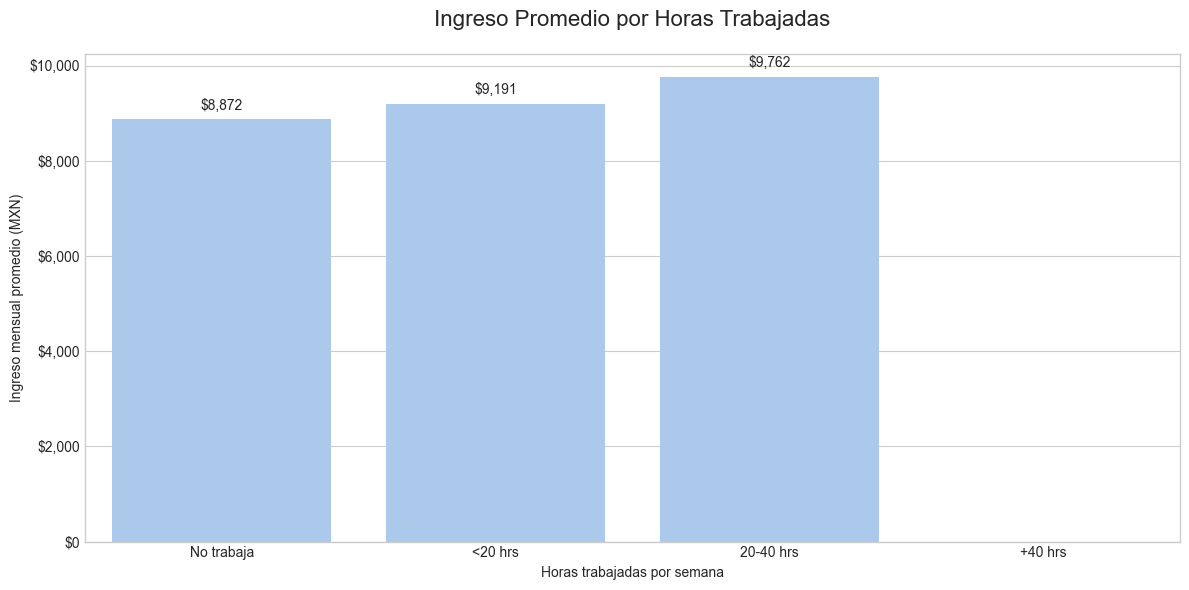

In [4]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x='horas_cat', y='ingreso_mensual',
                 estimator='mean', errorbar=None,
                 order=['No trabaja', '<20 hrs', '20-40 hrs', '+40 hrs'])

plt.title('Ingreso Promedio por Horas Trabajadas', fontsize=16, pad=20)
plt.xlabel('Horas trabajadas por semana')
plt.ylabel('Ingreso mensual promedio (MXN)')

for p in ax.patches:
    ax.annotate(f"${p.get_height():,.0f}",
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))
plt.tight_layout()
plt.savefig("graficos/1_ingreso_por_horas.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()


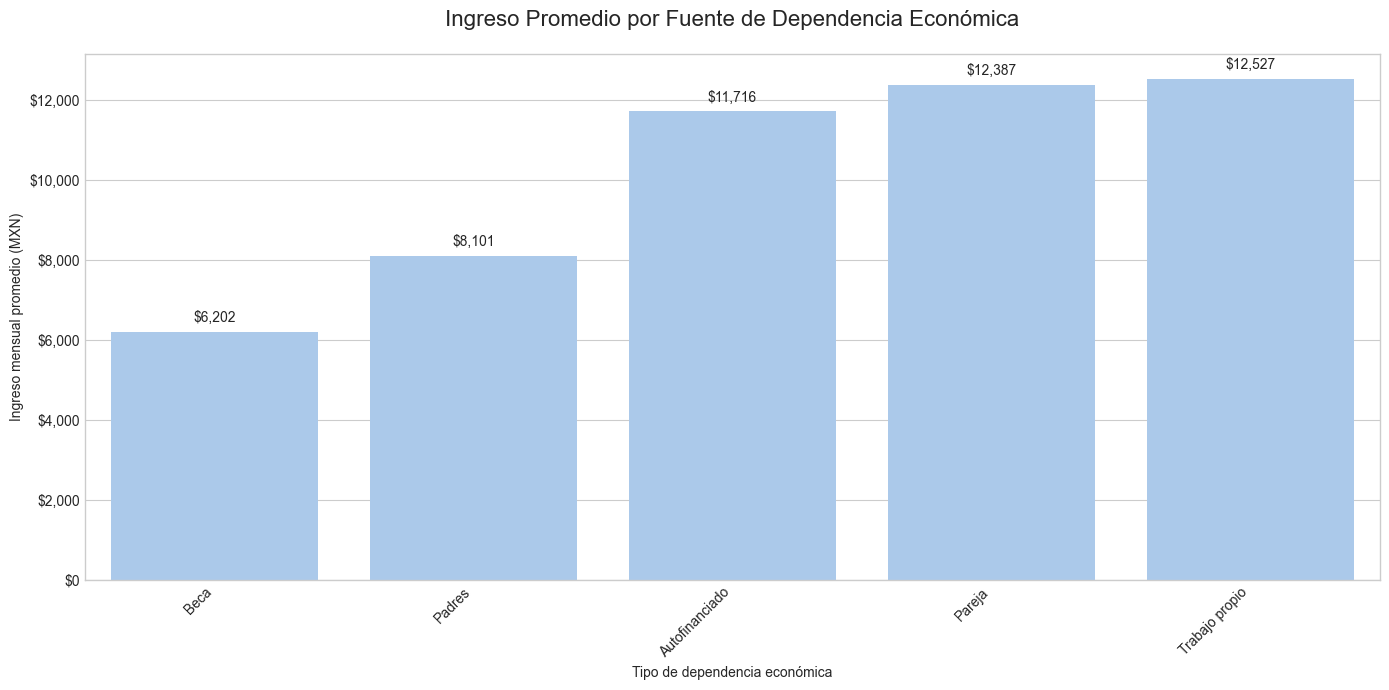

In [5]:
plt.figure(figsize=(14, 7))
order = df.groupby('dependencia_economica')['ingreso_mensual'].mean().sort_values().index

ax = sns.barplot(data=df, x='dependencia_economica', y='ingreso_mensual',
                 estimator='mean', errorbar=None, order=order)

plt.title('Ingreso Promedio por Fuente de Dependencia Económica', fontsize=16, pad=20)
plt.xlabel('Tipo de dependencia económica')
plt.ylabel('Ingreso mensual promedio (MXN)')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f"${p.get_height():,.0f}",
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))
plt.tight_layout()
plt.savefig("graficos/2_ingreso_por_dependencia.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()


C:\Users\acris\AppData\Local\Temp\ipykernel_15532\2264439595.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_df = df.groupby(['horas_cat', 'numero_hijos'])['ingreso_mensual'].mean().unstack()


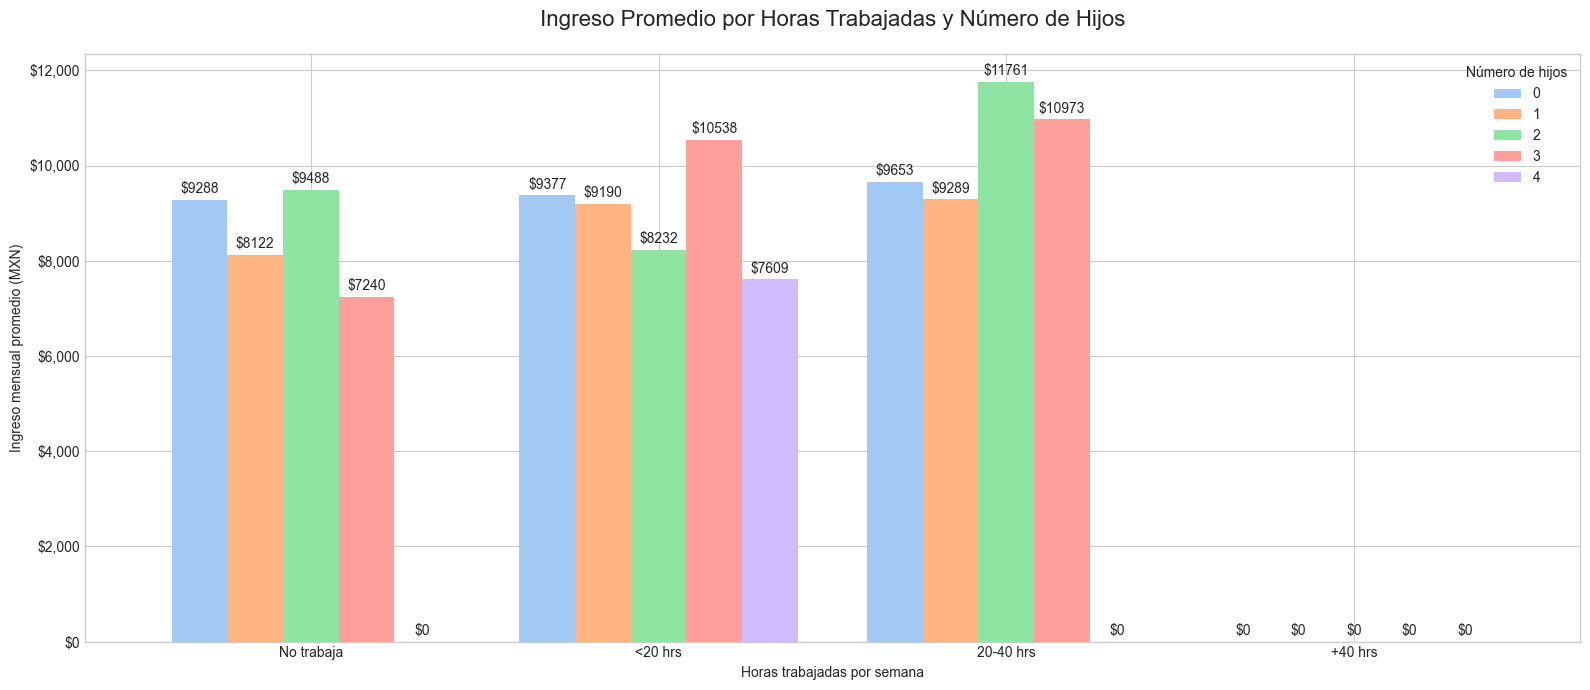

In [6]:
pivot_df = df.groupby(['horas_cat', 'numero_hijos'])['ingreso_mensual'].mean().unstack()

ax = pivot_df.plot(kind='bar', figsize=(16, 7), width=0.8)

plt.title('Ingreso Promedio por Horas Trabajadas y Número de Hijos', fontsize=16, pad=20)
plt.xlabel('Horas trabajadas por semana')
plt.ylabel('Ingreso mensual promedio (MXN)')
plt.xticks(rotation=0)
plt.legend(title='Número de hijos')

for container in ax.containers:
    ax.bar_label(container, fmt='$%.0f', label_type='edge', padding=3)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))
plt.tight_layout()
plt.savefig("graficos/3_ingreso_horas_hijos.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
